# WeatherPy

In [31]:
# To import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

## Generate Cities List
To do this, collect the weather data for each city.

In [2]:
# To produce a range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#To generate a list for holding lat_lngs and cities
lat_lngs = []
cities = []

# To create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# To identify the nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# To direct to url
weather_url = "http://api.openweathermap.org/data/2.5/weather?q="

# To store the weather informations
city_id = []
city_list = []
country = []
date = [] 
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

# To search throuch the data use a for loop

for i in range(len(cities)):
    
    city_name = '+'.join(cities[i].split(' '))

    city_query_url = weather_url + city_name + "&appid=" + weather_api_key
    city_data = requests.get(city_query_url).json()

    try:
        print(f"It's being processed: {i}-th city = {city_data['name']}:")
        
        # To retrieve city info and weather informations
        
        city_id.append(city_data['id'])
        city_list.append(city_data['name'])
        country.append(city_data['sys']['country'])
        date.append(city_data['dt'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        max_temp.append(city_data['main']['temp_max'])
        humidity.append(city_data['main']['humidity'])
        cloudiness.append(city_data['clouds']['all'])
        wind_speed.append(city_data['wind']['speed'])
        
    except KeyError:
        print(f"Found error : {i}-th city = {city_name} not found")

It's being processed: 0-th city = Vilhena:
It's being processed: 1-th city = Barrow:
It's being processed: 2-th city = Iqaluit:
It's being processed: 3-th city = Mar del Plata:
It's being processed: 4-th city = Ancud:
It's being processed: 5-th city = Vaini:
It's being processed: 6-th city = Busselton:
It's being processed: 7-th city = Aklavik:
Found error : 8-th city = illoqqortoormiut not found
It's being processed: 9-th city = Whitehorse:
It's being processed: 10-th city = Rikitea:
It's being processed: 11-th city = Ribeira Grande:
It's being processed: 12-th city = Hilo:
It's being processed: 13-th city = Kaitangata:
It's being processed: 14-th city = Tarko-Sale:
It's being processed: 15-th city = Padang:
It's being processed: 16-th city = Butaritari:
It's being processed: 17-th city = Haines Junction:
It's being processed: 18-th city = Batemans Bay:
It's being processed: 19-th city = Pangody:
It's being processed: 20-th city = Saskylakh:
Found error : 21-th city = attawapiskat not

Found error : 178-th city = palabuhanratu not found
It's being processed: 179-th city = Yellowknife:
It's being processed: 180-th city = Amahai:
It's being processed: 181-th city = Chicama:
It's being processed: 182-th city = Bambous Virieux:
It's being processed: 183-th city = Lüderitz:
It's being processed: 184-th city = Yar-Sale:
It's being processed: 185-th city = Nanortalik:
It's being processed: 186-th city = Hohhot:
Found error : 187-th city = bolungarvik not found
It's being processed: 188-th city = Mae Hong Son:
It's being processed: 189-th city = Vestmannaeyjar:
Found error : 190-th city = dzhusaly not found
It's being processed: 191-th city = Puerto Carreño:
It's being processed: 192-th city = Katsuura:
It's being processed: 193-th city = Puerto Baquerizo Moreno:
It's being processed: 194-th city = Tura:
It's being processed: 195-th city = Bethel:
It's being processed: 196-th city = São Filipe:
It's being processed: 197-th city = Fortuna:
It's being processed: 198-th city = 

It's being processed: 356-th city = Jacksonville:
It's being processed: 357-th city = Saint Anthony:
It's being processed: 358-th city = Khokhryaki:
Found error : 359-th city = maloshuyka not found
It's being processed: 360-th city = Candelaria:
It's being processed: 361-th city = Sioux Lookout:
It's being processed: 362-th city = Beringovskiy:
It's being processed: 363-th city = Tataouine:
It's being processed: 364-th city = Honiara:
It's being processed: 365-th city = Buin:
It's being processed: 366-th city = Palmer:
It's being processed: 367-th city = Norman Wells:
It's being processed: 368-th city = Minoh:
It's being processed: 369-th city = Manfredonia:
It's being processed: 370-th city = Mukhen:
It's being processed: 371-th city = Makkah al Mukarramah:
It's being processed: 372-th city = Helong:
It's being processed: 373-th city = Geraldton:
It's being processed: 374-th city = Kruisfontein:
It's being processed: 375-th city = Okhotsk:
It's being processed: 376-th city = Peleduy:


It's being processed: 533-th city = Astara:
It's being processed: 534-th city = Khasan:
It's being processed: 535-th city = Thanh Hoa:
It's being processed: 536-th city = Paita:
It's being processed: 537-th city = Muros:
Found error : 538-th city = guelengdeng not found
Found error : 539-th city = sorvag not found
It's being processed: 540-th city = Baykit:
It's being processed: 541-th city = Akdepe:
It's being processed: 542-th city = Avera:
It's being processed: 543-th city = Ulagan:
It's being processed: 544-th city = Talakan:
It's being processed: 545-th city = Makakilo City:
It's being processed: 546-th city = Nerchinskiy Zavod:
It's being processed: 547-th city = Warmbad:
It's being processed: 548-th city = Celestún:
It's being processed: 549-th city = Nome:
Found error : 550-th city = halalo not found
It's being processed: 551-th city = Rolla:
It's being processed: 552-th city = Dekar:
It's being processed: 553-th city = Halifax:
It's being processed: 554-th city = Mount Gambier

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# To convert the raw data to dataframe with unit conversion temp (K->F), wind_speed (m/s -> mph)

weather_df = pd.DataFrame({
    'City ID' : city_id,
    'City' : city_list,
    'Country' : country,
    'Date' : date,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp (F)' : [(k - 273.15) * (9/5) + 32 for k in max_temp],
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed (mph)' : [ws*2.2369 for ws in wind_speed]})

# To export the file as a CSV, without the Pandas index, but with the header
weather_df.to_csv(output_data_file, index=False, header=True)

In [5]:
# To generate a view of weather_df
weather_df.head()

,City ID,City,Country,Date,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed (mph)
0,3924679,Vilhena,BR,1605227092,-12.74,-60.15,78.800,74,0,4.69749
1,5880054,Barrow,US,1605226994,71.29,-156.79,10.400,78,90,10.28974
2,5983720,Iqaluit,CA,1605227092,63.75,-68.51,17.600,67,75,3.35535
3,3430863,Mar del Plata,AR,1605227092,-38.00,-57.56,64.994,77,0,14.98723
4,3899695,Ancud,CL,1605227093,-41.87,-73.82,53.996,66,90,5.81594


In [6]:
# To generate a count of the number of cities in the data set
weather_df.count()

City ID             533
City                533
Country             533
Date                533
Lat                 533
Lng                 533
Max Temp (F)        533
Humidity            533
Cloudiness          533
Wind Speed (mph)    533
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  To get the indices of cities that have humidity over 100%
humidity_100 = weather_df.loc[weather_df['Humidity']>100]

In [8]:
# To make a new DataFrame equal to the city data to drop all humidity outliers by index.

# To create a for loop to search for humidity greater than 100 
# If greater than 100 drop and if not print.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
if len(humidity_100.index) == 0:
    print("There are no cities that have humidity more than 100%")
else:
    weather_df.drop(humidity_100.index, inplace=True)
    weather_df.to_csv(output_data_file, index=False, header=True)

There are no cities that have humidity more than 100%


In [9]:
# To generate the date corresponding to the data
date = pd.to_datetime(weather_df['Date'],unit='s')[0].date()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

* Plot the following: 
    * Temperature (F) vs. Latitude
    * Humidity (%) vs. Latitude
    * Cloudiness (%) vs. Latitude
    * Wind Speed (mph) vs. Latitude

## Latitude vs. Temperature Plot

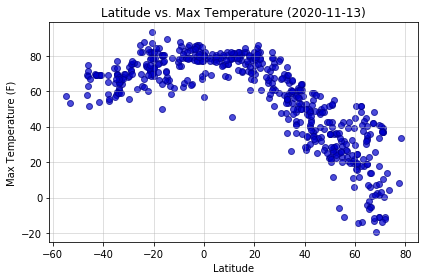

In [10]:
# Create variables xval=latitude and yval=max temperature to store Lat and Max Temp (F)
xval = weather_df['Lat']
yval = weather_df['Max Temp (F)']

# To generate scatter plot
plt.scatter(xval, yval, facecolor='mediumblue', alpha= 0.7, edgecolors='darkblue')
plt.grid(alpha=0.5)

# To generate title and other labels
plt.title(f"Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.tight_layout()

# To save to external output file
plt.savefig("output_data/lat_temperature")

# To print
plt.show()

The results indicate that the equator is not the hottest location. The data points at -20 latitude (below the equator) shows greater temperatures.

## Latitude vs. Humidity Plot

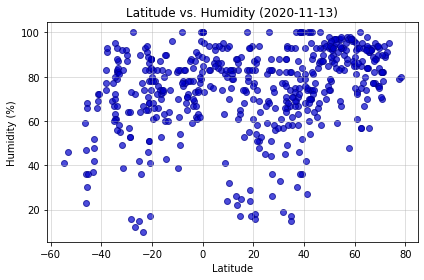

In [12]:
# Create variables xval=latitude and yval=humidity to store Lat and humidity 
xval = weather_df['Lat']
yval = weather_df['Humidity']

# To generate scatter plot
plt.scatter(xval, yval, facecolor='mediumblue', alpha= 0.7, edgecolors='darkblue')
plt.grid(alpha=0.5)

# To generate title and other labels
plt.title(f"Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()


# To save to external output file
plt.savefig("output_data/lat_humidity")

plt.show()


The results indicate that the humidity is actually higher above the equator because of the cluster below 60 degree latitude. However, there isn't a strong relationship between lattitude and humidity.  

## Latitude vs. Cloudiness Plot

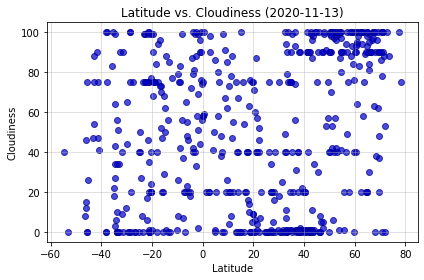

In [13]:
# Create variables xval=latitude and yval= cloudiness to store Lat and Cloudiness
xval = weather_df['Lat']
yval = weather_df['Cloudiness']

# To generate scatter plot
plt.scatter(xval, yval, facecolor='mediumblue', alpha= 0.7, edgecolors='darkblue')
plt.grid(alpha=0.5)

# To generate title and other labels
plt.title(f"Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()

# To save to external output file
plt.savefig("output_data/lat_cloudiness")

plt.show()


The results indicate that there is no relationship between cloudiness and latitude. 

## Latitude vs. Wind Speed Plot

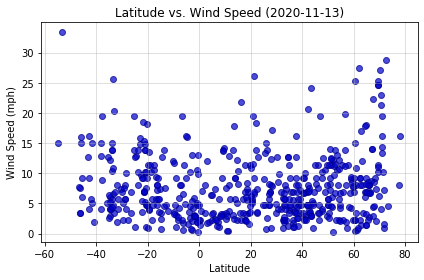

In [14]:

# Create variables xval=latitude and yval= wind speed to store Lat and wind speed (mph)
xval = weather_df['Lat']
yval = weather_df['Wind Speed (mph)']

# To generate scatter plot
plt.scatter(xval, yval, facecolor='mediumblue', alpha= 0.7, edgecolors='darkblue')
plt.grid(alpha=0.5)


# To generate title and other labels
plt.title(f"Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()

# To save to external output file
plt.savefig("output_data/lat_windspeed")

plt.show()


The results indicate that there is no relationship between wind speed and latitude. Wind speed seems to be consistent across all of the latitude data points. 

## Linear Regression

* Run a linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [15]:
# Create a function to create Linear Regression plots
def subplot_linregression(ax, xval, yval):
    
    (mm,cc,rr,pp,ss) = linregress(xval,yval)
    line_eq = "y = " + str(round(mm,2)) + " x + " + str(round(cc,2))
    est_yval = mm*xval + cc
    
    ax.plot(xval, est_yval, "r-")
    ax.annotate(line_eq, (5, 205), color="red", xycoords='axes points', size=12)
    ax.scatter(xval, yval, facecolor='mediumblue', alpha= 0.7, edgecolors='darkblue')    
    ax.set_xlabel("Latitude")
    
    return rr

In [16]:
# Create Northern and Southern Hemisphere DataFrames

north_df = weather_df.loc[weather_df['Lat']>0]
south_df = weather_df.loc[weather_df['Lat']<0]

####  Northern vs. Southern Hemisphere - Max Temp vs. Latitude Linear Regression

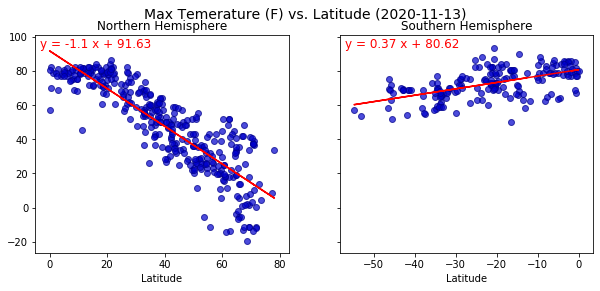

The r-sq of Northern Hemisphere are 0.7448243726057362
The r-sq of Southern Hemisphere are 0.32355622730850336


<Figure size 432x288 with 0 Axes>

In [42]:
# To set the figure for the linear regression plots
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
fig.suptitle(f"Max Temerature (F) vs. Latitude ({date})", size=14)

# To create the plot for the northern hemisphere
ax1.set_title("Northern Hemisphere")
n_rr = subplot_linregression(ax1, north_df['Lat'], north_df['Max Temp (F)'])

# To create the plot for the southern hemisphere
ax2.set_title("Southern Hemisphere")
s_rr = subplot_linregression(ax2, south_df['Lat'], south_df['Max Temp (F)'])
                
plt.show()

# To print the r-squared value
print(f"The r-sq of Northern Hemisphere are {n_rr**2}")
print(f"The r-sq of Southern Hemisphere are {s_rr**2}")

# To save to external output file
plt.savefig("output_data/north_south_tempNlat.png")

In [28]:
# To run a pearsons r correlation test 
north_correlation_df=north_df.corr(method='pearson')
north_correlation_df.head()

,City ID,Date,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed (mph)
City ID,1.000000,-0.235642,0.095545,-0.744772,0.012128,-0.114185,-0.060354,0.040474
Date,-0.235642,1.000000,-0.039243,0.240878,-0.026574,0.094961,-0.008429,0.017934
Lat,0.095545,-0.039243,1.000000,0.075325,-0.863032,0.289711,0.403062,0.240211
Lng,-0.744772,0.240878,0.075325,1.000000,-0.239871,0.182917,0.136304,-0.080880
Max Temp (F),0.012128,-0.026574,-0.863032,-0.239871,1.000000,-0.326546,-0.356093,-0.035678


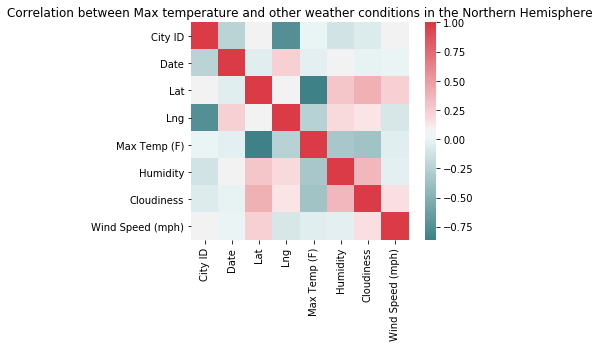

<Figure size 432x288 with 0 Axes>

In [40]:
corr = north_df.corr()
ax = sns.heatmap(corr, cmap=sns.diverging_palette(200,10, n=200), square=True)
ax.set_title("Correlation between Max temperature and other weather conditions in the Northern Hemisphere")
plt.show()

# To save to external output file
plt.savefig("output_data/north_heatmap.png")

In [29]:
# To run a pearsons r correlation test 
south_correlation_df=south_df.corr(method='pearson')
south_correlation_df.head()

,City ID,Date,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed (mph)
City ID,1.000000,-0.092498,-0.083289,-0.539032,-0.072202,-0.100858,0.030990,0.098840
Date,-0.092498,1.000000,0.211338,0.098315,0.183560,0.043161,-0.019030,-0.158145
Lat,-0.083289,0.211338,1.000000,-0.134689,0.568820,0.298793,0.222429,-0.290689
Lng,-0.539032,0.098315,-0.134689,1.000000,0.187704,-0.306537,0.023675,-0.121025
Max Temp (F),-0.072202,0.183560,0.568820,0.187704,1.000000,-0.217567,0.073761,-0.148067


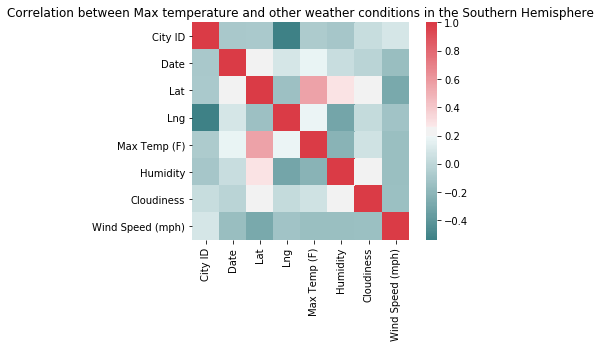

<Figure size 432x288 with 0 Axes>

In [41]:
corr = south_df.corr()
ax = sns.heatmap(corr, cmap=sns.diverging_palette(200,10, n=200), square=True)
ax.set_title("Correlation between Max temperature and other weather conditions in the Southern Hemisphere")
plt.show()
# To save to external output file
plt.savefig("output_data/south_heatmap.png")

The results for both hemispheres indicate that there is a linear relationship between latitude and temperature.

In the Northern hemisphere the change in temperature decreases 1.1 degrees F for every unit increase in latitude. The R-squared tells us that 74% of the observed variance is explained by the linear regression.

In the Sourthern hemisphere the change in temperatures increases by 0.37 degrees F for every unit increase in latitude. The R-squared for this model tells us that 32% of the variance is explaind by the linear regression. 

A lower R-square doesn't automatically mean that the model is not a good fit. The pearson's correlation coefficient for the Northern Hemisphere is -0.86. This tells us the relationship is a fairly strong negative relationship - as temperature decreases latitude decreases.

The pearson's correlation coefficient for the Southern Hemisphere is 0.57. This tells us that the relationship is a less than moderate positive relationship: as temperature increases, latitude also increases. This explains the lower R-squared. 


####  Northern vs. Southern Hemisphere  - Humidity (%) vs. Latitude Linear Regression

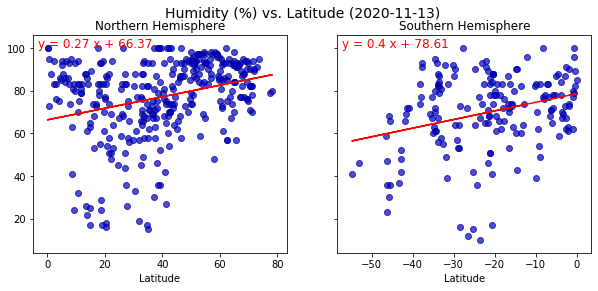

The r-sq of North Hemisphere are 0.08393236108110849
The r-sq of South Hemisphere are 0.08927699235752949


<Figure size 432x288 with 0 Axes>

In [45]:
# To set the figure for the linear regression plots
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
fig.suptitle(f"Humidity (%) vs. Latitude ({date})", size=14)

# To create the plot for the northern hemisphere
ax1.set_title("Northern Hemisphere")
n_rr = subplot_linregression(ax1, north_df['Lat'], north_df['Humidity'])

# To create the plot for the southern hemisphere
ax2.set_title("Southern Hemisphere")
s_rr = subplot_linregression(ax2, south_df['Lat'], south_df['Humidity'])
                
plt.show()

# To print the r-squared value
print(f"The r-sq of North Hemisphere are {n_rr**2}")
print(f"The r-sq of South Hemisphere are {s_rr**2}")

# To save to external output file
plt.savefig("output_data/north_south_LATNhumidityt.png")

The results for both hemispheres indicate that there is not a linear relationship between latitude and humidity.

In the Northern hemisphere the R-squared for this model tells us that .08% of the variance is explaind by the linear regression. 

The extremely low R-squared is also seen in the regression for the southern hemisphere. .09% of the variance is explained by the linear regression. 


####  Northern vs. Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

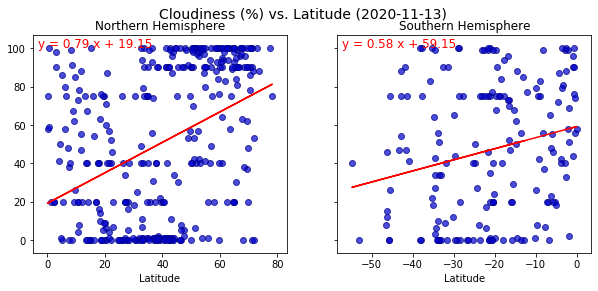

The r-sq of North Hemisphere are 0.16245883089959706
The r-sq of South Hemisphere are 0.04947448006464786


<Figure size 432x288 with 0 Axes>

In [44]:
# To set the figure for the linear regression plots
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
fig.suptitle(f"Cloudiness (%) vs. Latitude ({date})", size=14)

# To create the plot for the northern hemisphere
ax1.set_title("Northern Hemisphere")
n_rr = subplot_linregression(ax1, north_df['Lat'], north_df['Cloudiness'])

# To create the plot for the southern hemisphere
ax2.set_title("Southern Hemisphere")
s_rr = subplot_linregression(ax2, south_df['Lat'], south_df['Cloudiness'])
                
plt.show()

# To print the r-squared value
print(f"The r-sq of North Hemisphere are {n_rr**2}")
print(f"The r-sq of South Hemisphere are {s_rr**2}")

# To save to external output file
plt.savefig("output_data/north_south_cloudinessNLat.png")

The results for both hemispheres indicate that there is not a linear relationship between cloudiness and latitude.

In the Northern hemisphere the R-squared for this model tells us that .16% of the variance is explaind by the linear regression.

The extremely low R-squared is also seen in the regression for the southern hemisphere. .04% of the variance is explained by the linear regression.

####  Northern vs. Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

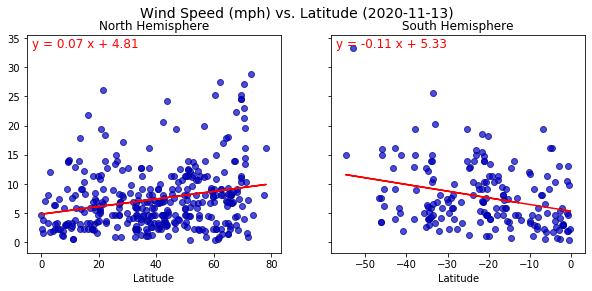

The r-sq of North Hemisphere are 0.05770145042236413
The r-sq of South Hemisphere are 0.08450003426337445


<Figure size 432x288 with 0 Axes>

In [46]:
# To set the figure for the linear regression plots
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
fig.suptitle(f"Wind Speed (mph) vs. Latitude ({date})", size=14)


# To create the plot for the northern hemisphere
ax1.set_title("North Hemisphere")
n_rr = subplot_linregression(ax1, north_df['Lat'], north_df['Wind Speed (mph)'])

# To create the plot for the southern hemisphere
ax2.set_title("South Hemisphere")
s_rr = subplot_linregression(ax2, south_df['Lat'], south_df['Wind Speed (mph)'])
                
plt.show()

# To print the r-squared value
print(f"The r-sq of North Hemisphere are {n_rr**2}")
print(f"The r-sq of South Hemisphere are {s_rr**2}")

# To save to external output file
plt.savefig("output_data/north_south_windNLat.png")

The results for both hemispheres indicate that there is not a linear relationship between windspeed and latitude.

In the Northern hemisphere the R-squared for this model tells us that .06% of the variance is explaind by the linear regression.

The extremely low R-squared is also seen in the regression for the southern hemisphere. .08% of the variance is explained by the linear regression.